### 1.Objetivo

    O objetivo desse trabalho projeto é construir um programa que consiga identificar linhas de uma estrada, princípio de funcionamento de carros autônomos integrado à visão computacional. O objetivo final é fazer o programa identificar a estrada e identificar as linhas de pista

    Para isso, usaremos as bibliteocas openCV e numpy

### 2. Importando funções

In [40]:
import cv2
import numpy as np

### 2.1. Aplicando Threshold

    Criando a variável para a imagem que vamos analisar (criando, ainda, uma cópia para esta, para termos como referência original)
    Em seguinte, aplica-se o threshold na imagem

    Como resultado, temos nossa imagem preto e branca pronta para receber alguns filtros a fim de diminuir o ruído presente nesta

In [41]:
image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
cv2.imshow('result', gray)
cv2.waitKey(0)

-1

### 2.2. Aplicando filtro Gaussiano

    O objetivo agora é reduzir o ruído e suavizar a nossa imagem quando estiver detectando bordas. Isso porque é importante capturar com precisão o maior número de curvas presentes. Abaixo, A função cv2.GaussianBlur() é usada para aplicar um filtro gaussiano em uma imagem em escala de cinza. Esse filtro suaviza a imagem, reduzindo o ruído e detalhes, resultando em uma imagem mais suave e borrada. Os parâmetros usados são o tamanho do kernel (janela de convolução) e o desvio padrão do filtro gaussiano. O resultado é uma imagem suavizada para uso em outros processos de análise de imagem.

In [42]:
image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
cv2.imshow('result', gray)
cv2.waitKey(0)

-1

    Ao ler a documentação do OpenCV, encontrei a função "canny()", que realiza justamente o que acabou de ser feito na variável "blur" acima:
    a função canny irá, internamente, aplicar uma gaussiana 5x5 ao ser usada.
    Vamos, então, utilizar essa função

In [43]:
image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
canny = cv2.Canny(blur, 50, 150)
cv2.imshow('result', canny)
cv2.waitKey(0)

-1

    Acima, a linha de código canny = cv2.Canny(blur, 50, 150) utiliza a função cv2.Canny() da biblioteca OpenCV para aplicar o algoritmo de detecção de bordas de Canny em uma imagem previamente suavizada com um filtro Gaussiano.

    Os parâmetros utilizados na função são:

    * blur: É a imagem suavizada em escala de cinza, obtida pela aplicação do filtro Gaussiano na imagem original.
    * 50: É o valor do limiar inferior. Pixels com gradientes de intensidade abaixo desse valor serão considerados como bordas fracas.
    * 150: É o valor do limiar superior. Pixels com gradientes de intensidade acima desse valor serão considerados como bordas fortes.
    
    A função cv2.Canny() realiza a detecção de bordas na imagem suavizada, identificando regiões de mudanças bruscas de intensidade de cor, que geralmente correspondem a bordas entre objetos ou áreas de interesse na imagem. O algoritmo de Canny é conhecido por sua capacidade de produzir bordas precisas e de minimizar a ocorrência de bordas falsas causadas por ruído na imagem. O resultado da função é uma imagem binária com as bordas detectadas em branco (255) e o resto da imagem em preto (0), o que facilita a identificação e extração das bordas na imagem para posterior processamento ou análise.

### 3. Determinando a região de interesse

    A fim de analisar nossa imagem, precisamos determinar uma região de interesse que vamos utilizar para detecar as linhas de pista

    Podemos aproveitar o código desenvolvido até agora e criar uma função:

In [48]:
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

In [45]:
image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny(lane_image)
cv2.imshow('result', canny)
cv2.waitKey(0)

-1

    Com o auxilio do matplotlib, podemos determinar as coordenadas da região que temos interesse em analisar, para isso, vamos importar a biblioteca e analisar nossa imagem com as coordenadas

In [35]:
import matplotlib.pyplot as plt

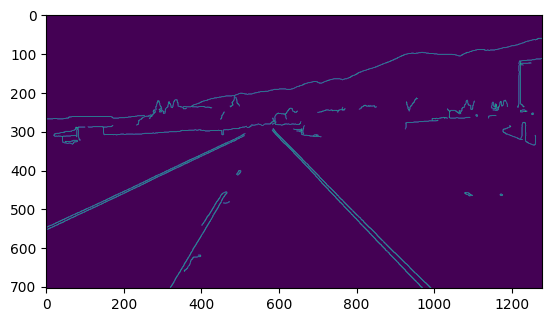

In [36]:
plt.imshow(canny)
plt.show()

    Queremos desenhar um triângulo, com coordenadas: (200,700) e (1100,700), e com seu último vértice com coordenadas (550,250). O triângulo logo ficará mais visível conforme avanço na explicação

    Definindo nossa região de interesse:

In [46]:
def region_of_interest(image):
    height = image.shape[0] 
    polygons = np.array([
    [(200, height), (1100, height), (550, 250)]
    ])
    mask = np.zeros_like(image) 
    cv2.fillPoly(mask, polygons, 255) 

    return mask

    Para a função definida acima, temos a seguinte explicação:

    height = image.shape[0]: É obtida a altura (número de linhas) da imagem de entrada, que é usada posteriormente para definir as coordenadas dos vértices do polígono de interesse

    polygons = np.array([[(200, height), (1100, height), (550, 250)]]): É definido um array numpy que contém as coordenadas dos vértices de um polígono que representa a área de interesse na imagem. Neste caso, o polígono é definido por três pontos, com as coordenadas (200, height), (1100, height) e (550, 250). Essas coordenadas são escolhidas para formar o triângulo desejado

    mask = np.zeros_like(image): É criada uma imagem de zeros com o mesmo formato (shape) da imagem de entrada, ou seja, com o mesmo número de linhas, colunas e canais de cor, preenchida com valores zeros. Essa imagem será usada como máscara para preservar a região de interesse na imagem de entrada.

    cv2.fillPoly(mask, polygons, 255): É preenchido o polígono de interesse na máscara com o valor 255, que representa o valor máximo de intensidade de cor (branco). Isso cria uma área branca correspondente à região de interesse na máscara.

    PS: O código fica dando erro por conta da definição da função canny, então estou trazendo ela em cada bloco para evitar isso


In [50]:
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny(lane_image)
cv2.imshow('result', region_of_interest(canny))
cv2.waitKey(0)

-1

        Agora, o próximo passo é encontrar uma maneira de usar essa máscara na nossa image proveniente da função canny()
        
        Para isso, utilizarei a função bitwse, explicada abaixo:
        
        masked_image = cv2.bitwise_and(image, mask): É aplicada uma operação de "e" bit a bit (bitwise and) entre a imagem de entrada e a máscara, preservando apenas os pixels onde ambos têm valores diferentes de zero. Isso efetivamente aplica a máscara na imagem, mantendo apenas a região de interesse e descartando o restante. No fim, apenas será mostrado a região de interesse traçado pelo contorno do nosso polígono (máscara aplicada)

        Atualizando nossa função definida:

In [51]:
def region_of_interest(image):
    height = image.shape[0] 
    polygons = np.array([
    [(200, height), (1100, height), (550, 250)]
    ])
    mask = np.zeros_like(image) 
    cv2.fillPoly(mask, polygons, 255) 
    masked_image = cv2.bitwise_and(image, mask)

    return masked_image

    Analisando o novo resultado:

In [52]:
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny(lane_image)
cropped_image = region_of_interest(canny)
cv2.imshow('result', cropped_image)
cv2.waitKey(0)

-1

### 4. Hough Algorithm

    Agora que ja identificamos as bordas e a região de interesse na nossa imagem, vamos utilizar a técnica de Hough para segmentos de retas na imagem e, assim, identificar as linhas da estrada. O nome dessa técnica é Hough Transform

    Essa técnica, em resumo, irá analisar possiveis linhas de uma série de pontos encontrada ao examinar o conjunto amostral com o maior número de votos, ou seja, o maior número de interseções dentro desse espaço de amostra

    Assim:

In [ ]:
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny(lane_image)
cropped_image = region_of_interest(canny)
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
cv2.imshow('result', lines)
cv2.waitKey(0)

    Explicando a linha " lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)" do código acima:

    Essa linha de código é um exemplo de como utilizar a Transformada de Hough para detecção de linhas em uma imagem usando a biblioteca OpenCV (cv2) em uma linguagem de programação, como Python. Vamos explicar os parâmetros utilizados nessa função:

- `cropped_image`: É a imagem de entrada na qual as linhas serão detectadas
- `2`: É o valor de resolução do espaço de parâmetros rho, que é a distância mínima em pixels entre duas linhas paralelas que serão detectadas. Valores menores de rho resultam em uma maior sensibilidade à detecção de linhas próximas, enquanto valores maiores de rho resultam em uma detecção mais geral de linhas em toda a imagem.
- `np.pi/180`: É o valor de resolução do espaço de parâmetros theta, que é o ângulo mínimo em radianos entre duas linhas que serão detectadas. Geralmente, é definido como np.pi/180 para que as linhas sejam detectadas em intervalos de 1 grau.
- `100`: É o valor de limiar de votos. Somente as linhas que recebem um número de votos acima desse limiar serão consideradas como linhas detectadas. Ajustar esse valor pode afetar a sensibilidade e precisão da detecção de linhas.
- `np.array([])`: É o arranjo de saída que armazenará as linhas detectadas. Neste caso, está vazio, indicando que nenhum arranjo de linhas foi fornecido antecipadamente.
- `minLineLength=40`: É o comprimento mínimo de linha em pixels que será considerado como uma linha válida. Linhas abaixo desse comprimento serão descartadas.
- `maxLineGap=5`: É a distância máxima permitida entre segmentos de linha para serem conectados em uma única linha. Segmentos de linha que estão mais distantes do que esse valor serão considerados linhas separadas.

Essa função retornará uma lista de linhas detectadas na forma de coordenadas de início e fim (x1, y1, x2, y2), onde (x1, y1) são as coordenadas do início da linha e (x2, y2) são as coordenadas do fim da linha. Essas linhas podem ser posteriormente desenhadas na imagem de entrada para visualização ou para outras finalidades.

    Criando uma função para o nosso novo display, com o objetivo de desenhar as linhas detectadas pela Transformada de Hough na nossa imagem. Explicando o funcionamento dessa função:

- `image`: É a imagem de entrada na qual as linhas foram detectadas.
- `lines`: É a lista de linhas detectadas retornadas pela função `cv2.HoughLinesP()`
- `line_image`: É uma imagem vazia com as mesmas dimensões da imagem de entrada, criada com `np.zeros_like(image)`, onde as linhas serão desenhadas.
- `if lines is not None`: É uma verificação para garantir que a lista de linhas não esteja vazia, ou seja, tenha linhas detectadas. Se a lista de linhas estiver vazia, nenhum desenho será realizado.
- `for line in lines:`: É um loop que percorre cada linha detectada na lista de linhas.
- `x1,y1,x2,y2 = line.reshape(4)`: As coordenadas de início e fim da linha são extraídas do vetor de linha detectada, que geralmente é representado como um arranjo numpy de 1D com 4 elementos (x1, y1, x2, y2).
- `cv2.line(line_image, (x1,y1), (x2,y2), (255,0,0), 10)`: É uma função que desenha a linha na imagem de linha, utilizando as coordenadas de início e fim da linha, a cor (255,0,0) em formato BGR (azul), e a espessura da linha (10 pixels).
- `return line_image`: A imagem de linha com as linhas desenhadas é retornada como resultado da função.

Essa função pode ser usada para visualizar as linhas detectadas pela Transformada de Hough na nossa imagem

In [53]:
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(line_image, (x1,y1), (x2,y2), (255,0,0), 10)
    return line_image

In [54]:
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny(lane_image)
cropped_image = region_of_interest(canny)
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
line_image = display_lines(lane_image, lines)
cv2.imshow('result', line_image)
cv2.waitKey(0)

-1

    Agora, vamos combinar esse display de linhas da transformada Hough, com a nossa imagem real

    Em .addWeighted(), estamos somando a matriz de imagem de ambas as imagens (é por isso que line_image tem um fundo preto, pois não afetará a imagem original ao somar. Multiplicamos os pixels de lane_image por 0.8 para torná-los mais escuros e multiplicamos os pixels de line_image por 1.0, então os pixels são 20% mais claros, tornando nossas linhas mais claramente definidas)

In [56]:
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

image = cv2.imread('test_image.jpg')
lane_image = np.copy(image)
canny = canny(lane_image)
cropped_image = region_of_interest(canny)
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
line_image = display_lines(lane_image, lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1) 
cv2.imshow('result', combo_image)
cv2.waitKey(0)

-1

### 5. Conclusão

        Desse modo, o projeto implementou um algoritmo de detecção de faixas de trânsito em imagens usando a biblioteca OpenCV em Python. O algoritmo utiliza técnicas de processamento de imagens, como conversão para escala de cinza utilizando threshold, aplicação de blur gaussiano e detecção de bordas usando o operador de Canny. Em seguida, uma região de interesse é definida para focar apenas nas áreas relevantes da imagem. A transformada de Hough é aplicada para identificar linhas na imagem. As coordenadas das faixas de trânsito identificadas são então utilizadas para desenhar linhas sobre a imagem original. 
        O projeto é uma demonstração simples de como a visão computacional pode ser utilizada para detecção de faixas de trânsito em imagens de estradas e pode ser expandido para aplicação em sistemas de assistência ao motorista e veículos autônomos. É uma base sólida para o desenvolvimento de sistemas mais complexos de assistência à condução e detecção de faixas em tempo real.

### 6. Referências

    1. OpenCV - Documentação oficial: https://docs.opencv.org/master/
    2. S. Ballal, A. Tiwari, S. A. Narote, and S. Sarkale, "Real-time lane detection system using computer vision techniques," 2017 International Conference on Inventive Communication and Computational Technologies (ICICCT), 2017, pp. 1-6.
    3. R. Y. Tobing, A. B. Suksmono, and P. C. Purnomo, "Real-time road lane detection using adaptive Hough line transform and Kalman filter," 2014 International Conference on Advanced Computer Science and Information Systems (ICACSIS), 2014, pp. 19-23.